# **Load Dataset**

## 1.1 Install Packages

In [ ]:
!pip install nltk
!pip install PySastrawi
!pip install imbalanced-learn
!pip install black[jupyter]

     |████████████████████████████████| 210 kB 5.3 MB/s 
     |████████████████████████████████| 1.4 MB 5.4 MB/s 
     |████████████████████████████████| 96 kB 4.9 MB/s 
     |████████████████████████████████| 843 kB 38.8 MB/s 
     |████████████████████████████████| 793 kB 47.5 MB/s 
     |████████████████████████████████| 381 kB 38.6 MB/s 
  Attempting uninstall: prompt-toolkit
    Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
  Attempting uninstall: ipython
    Found existing installation: ipython 5.5.0
    Uninstalling ipython-5.5.0:
      Successfully uninstalled ipython-5.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency c

## 1.2 Import Libraries





In [ ]:
import re

import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
from google.colab import data_table, drive
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

## 1.3 Colab Configuration
You can ignore this section if you are not using Google Colab

In [ ]:
# mount Drive
drive.mount("/content/drive")

# enable data table display (interactive table)
data_table.enable_dataframe_formatter()

Mounted at /content/drive


## 1.4 Import Dataset

In [ ]:
# import dataset, forked dataset from (Ibrohim & Budi, 2019)
# link to 'https://raw.githubusercontent.com/okkyibrohim/id-multi-label-hate-speech-and-abusive-language-detection/master/re_dataset.csv'
df = "https://raw.githubusercontent.com/ryzanugrah/id-multi-label-hate-speech-and-abusive-language-detection/master/re_multi_label_dataset.csv"
df = pd.read_csv(df, encoding="utf-8")

In [ ]:
# check how many records are in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13169 entries, 0 to 13168
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Tweet        13169 non-null  object
 1   HS           13169 non-null  int64 
 2   HS_Weak      13169 non-null  int64 
 3   HS_Moderate  13169 non-null  int64 
 4   HS_Strong    13169 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 514.5+ KB


In [ ]:
# show the first 5 dataset rows
print("Number of Data: ", df.shape)
df.head()

Number of Data:  (13169, 5)


,Tweet,HS,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,1,0,0,1
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,0,1,0


## 1.5 Show Data on Chart

### 1.5.1 Histogram

1    7309
0    5860
Name: HS, dtype: int64

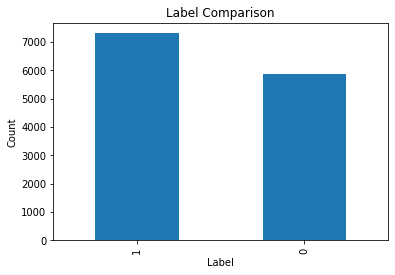

In [ ]:
pd.value_counts(df["HS"]).plot.bar()
plt.title("Label Comparison")
plt.xlabel("Label")
plt.ylabel("Count")

# if you want to save this chart, uncomment line below
# plt.savefig('label_histogram', dpi=300)

df["HS"].value_counts()

### 1.5.2 Donut Chart

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: float or None
  animated: bool
  antialiased or aa: unknown
  capstyle: {'butt', 'round', 'projecting'}
  center: unknown
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color: color
  contains: callable
  edgecolor or ec: color or None or 'auto'
  facecolor or fc: color or None
  figure: `.Figure`
  fill: bool
  gid: str
  hatch: {'/', '\\', '|', '-', '+', 'x', 'o', 'O', '.', '*'}
  in_layout: bool
  joinstyle: {'miter', 'round', 'bevel'}
  label: object
  linestyle or ls: {'-', '--', '-.', ':', '', (offset, on-off-seq), ...}
  linewidth or lw: float or None
  path_effects: `.AbstractPathEffect`
  picker: None or bool or float or callable
  radius: unknown
  rasterized: bool or None
  sketch_params: (scale: float, length: float, randomness: float)
  snap: bool or None
  theta1: unknown
  theta2: unknown
  transform: `.Transf

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.


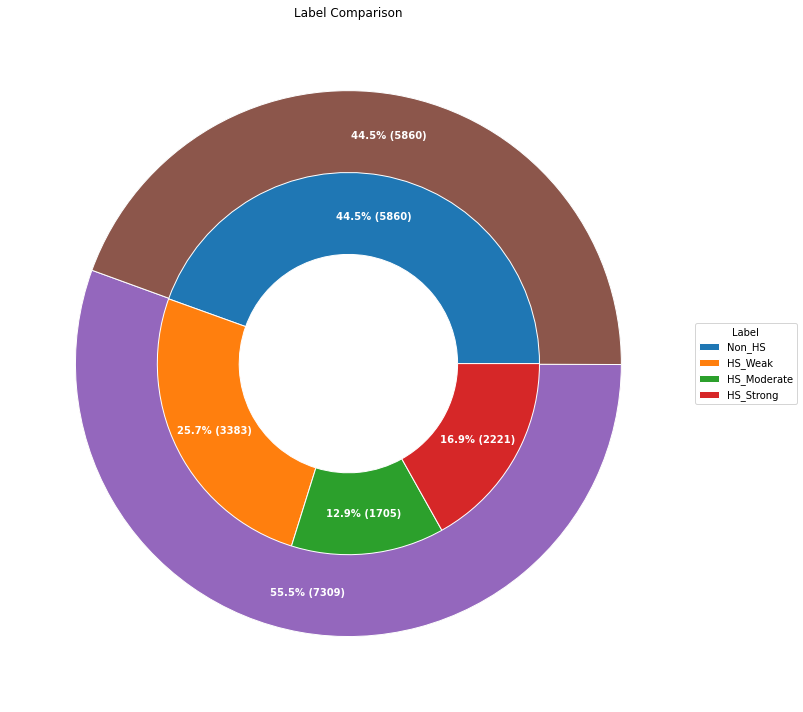

In [ ]:
def show_pie(inner_label, outer_label, inner_df, outer_df, legend_title):
    fig, ax = plt.subplots(figsize=(20, 10), subplot_kw=dict(aspect="equal"))
    width = 0.3
    labels = [x.split()[-1] for x in inner_label]

    def func(pct, allvals):
        absolute = int(round(pct / 100.0 * np.sum(allvals)))
        return "{:.1f}% ({:d})".format(pct, absolute)

    # inner pie
    inner_pie = ax.pie(
        inner_df,
        autopct=lambda pct: func(pct, inner_df),
        textprops=dict(color="white", weight="bold"),
        pctdistance=0.55,
        wedgeprops={"width": 0.6, "edgecolor": "white"},
    )
    plt.setp(inner_pie)

    # outer pie
    outer_pie = ax.pie(
        outer_df,
        autopct=lambda pct: func(pct, outer_df),
        textprops=dict(color="white", weight="bold"),
        pctdistance=0.85,
        wedgeprops={"width": 0.3, "edgecolor": "white"},
        startangle=160,
    )
    plt.setp(outer_pie)

    # set legend label
    ax.legend(
        labels, title=legend_title, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1)
    )

    ax.set_title("Label Comparison")

    # # if you want to save this chart, uncomment line below
    # plt.savefig("label_chart", dpi=300)

    # show chart
    plt.tight_layout()
    plt.show()


# count value on each label
hs_label = df.HS.value_counts()
non_hs_label = df.loc[df.HS == 0, "HS"].count()
hs_weak_label = df.loc[df.HS_Weak == 1, "HS_Weak"].count()
hs_moderate_label = df.loc[df.HS_Moderate == 1, "HS_Moderate"].count()
hs_strong_label = df.loc[df.HS_Strong == 1, "HS_Strong"].count()

inner_label = ["Non_HS", "HS_Weak", "HS_Moderate", "HS_Strong"]
outer_label = ["HS", "Non_HS"]
count_inner_data = [non_hs_label, hs_weak_label, hs_moderate_label, hs_strong_label]
count_outer_data = [hs_label]

show_pie(inner_label, outer_label, count_inner_data, count_outer_data, "Label")

## 1.6 Import Slang Dictionary

In [ ]:
# import kamus alay (indonesian slang words dictionary) from (Ibrohim & Budi, 2019)
alay_dict = "https://raw.githubusercontent.com/okkyibrohim/id-multi-label-hate-speech-and-abusive-language-detection/master/new_kamusalay.csv"
alay_dict = pd.read_csv(alay_dict, encoding="latin-1", header=None)
alay_dict = alay_dict.rename(columns={0: "original", 1: "replacement"})

print("Number of Data: ", alay_dict.shape)
alay_dict.head()

Number of Data:  (15167, 2)


,original,replacement
0,anakjakartaasikasik,anak jakarta asyik asyik
1,pakcikdahtua,pak cik sudah tua
2,pakcikmudalagi,pak cik muda lagi
3,t3tapjokowi,tetap jokowi
4,3x,tiga kali


# **Text Preprocessing**

## 2.1 Data Cleaning

In [ ]:
nltk.download("stopwords")
nltk.download("punkt")

stop_words = nltk.corpus.stopwords.words("indonesian")


def data_cleaning(text):
    emoticon_byte_regex = r"\s*(?:\\x[A-Fa-f0-9]{2})+"
    url_regex = "((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+)||(http\S+))"

    text = re.sub(emoticon_byte_regex, "", text)  # remove emoticon bytes
    text = re.sub(url_regex, "", text)  # remove every url
    text = re.sub(r"<[^>]*>", "", text)  # remove html tags
    text = re.sub(r"@[A-Za-z0-9]+", "", text)  # remove twitter usernames
    text = re.sub(r"\\n", " ", text)  # remove every new line '\n'
    text = re.sub("@[\w\-]+", "", text)  # remove mentions
    text = re.sub("RT", "", text)  # remove every retweet symbol
    text = re.sub("USER", "", text)  # remove every user
    text = re.sub(" URL", " ", text)  # remove word URL
    text = re.sub(" url", " ", text)  # remove word url
    text = re.sub("\\+", " ", text)  # remove backslash
    text = re.sub("\s+", " ", text)  # remove special regular expression character
    text = re.sub("[^0-9a-zA-Z]", " ", text)  # remove punctuation
    text = re.sub("[^a-zA-Z]", " ", text)  # remove numbers
    text = re.sub(" +", " ", text)  # remove extra spaces

    word_tokens = word_tokenize(text)

    filtered_sentence = []
    for word_token in word_tokens:
        if word_token not in stop_words:
            filtered_sentence.append(word_token)

    # join words
    text = " ".join(filtered_sentence)
    return text


df["text_cleaned"] = df["Tweet"].apply(data_cleaning)
df.text_cleaned = df.text_cleaned.str.strip()

df[["Tweet", "text_cleaned"]].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,Tweet,text_cleaned
0,- disaat semua cowok berusaha melacak perhatia...,disaat cowok berusaha melacak perhatian gue lo...
1,RT USER: USER siapa yang telat ngasih tau elu?...,telat ngasih tau elu edan sarap gue bergaul ci...
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",Kadang berfikir percaya Tuhan jatuh berkali ka...
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,AKU ITU AKU KU TAU MATAMU SIPIT TAPI DILIAT DA...
4,USER USER Kaum cebong kapir udah keliatan dong...,Kaum cebong kapir udah keliatan dongoknya dong...


## 2.2 Case Folding

In [ ]:
# lowercase letters
def case_folding(text):
    text = text.lower()
    return text


df["text_folded"] = df["text_cleaned"].apply(case_folding)
df[["text_cleaned", "text_folded"]].head()

,text_cleaned,text_folded
0,disaat cowok berusaha melacak perhatian gue lo...,disaat cowok berusaha melacak perhatian gue lo...
1,telat ngasih tau elu edan sarap gue bergaul ci...,telat ngasih tau elu edan sarap gue bergaul ci...
2,Kadang berfikir percaya Tuhan jatuh berkali ka...,kadang berfikir percaya tuhan jatuh berkali ka...
3,AKU ITU AKU KU TAU MATAMU SIPIT TAPI DILIAT DA...,aku itu aku ku tau matamu sipit tapi diliat da...
4,Kaum cebong kapir udah keliatan dongoknya dong...,kaum cebong kapir udah keliatan dongoknya dong...


## 2.3 Normalization

In [ ]:
alay_dict_map = dict(zip(alay_dict["original"], alay_dict["replacement"]))


def normalize_alay_dict(text):
    return " ".join(
        [
            alay_dict_map[word] if word in alay_dict_map else word
            for word in text.split(" ")
        ]
    )


df["text_normalized"] = df["text_folded"].apply(normalize_alay_dict)
df[["text_folded", "text_normalized"]].head()

,text_folded,text_normalized
0,disaat cowok berusaha melacak perhatian gue lo...,di saat cowok berusaha melacak perhatian gue k...
1,telat ngasih tau elu edan sarap gue bergaul ci...,telat memberi tau kamu edan sarap gue bergaul ...
2,kadang berfikir percaya tuhan jatuh berkali ka...,kadang berpikir percaya tuhan jatuh berkali ka...
3,aku itu aku ku tau matamu sipit tapi diliat da...,aku itu aku ku tau matamu sipit tapi dilihat d...
4,kaum cebong kapir udah keliatan dongoknya dong...,kaum cebong kafir sudah kelihatan dongoknya du...


## 2.4 Filtering

In [ ]:
# stopword from Tala, F. Z. (2003)
id_stopword_dict = pd.read_csv(
    "https://raw.githubusercontent.com/stopwords-iso/stopwords-id/master/stopwords-id.txt",
    header=None,
)
id_stopword_dict = id_stopword_dict.rename(columns={0: "stopword"})

In [ ]:
id_stopword_dict.head(10)

,stopword
0,ada
1,adalah
2,adanya
3,adapun
4,agak
5,agaknya
6,agar
7,akan
8,akankah
9,akhir


In [ ]:
def remove_stopword(text):
    text = " ".join(
        [
            "" if word in id_stopword_dict.stopword.values else word
            for word in text.split(" ")
        ]
    )
    text = re.sub("  +", " ", text)  # remove extra spaces
    text = text.strip()
    return text


df["text_filtered"] = df["text_normalized"].apply(remove_stopword)
df[["text_normalized", "text_filtered"]].head()

,text_normalized,text_filtered
0,di saat cowok berusaha melacak perhatian gue k...,cowok berusaha melacak perhatian gue lantas re...
1,telat memberi tau kamu edan sarap gue bergaul ...,telat tau edan sarap gue bergaul cigax jifla c...
2,kadang berpikir percaya tuhan jatuh berkali ka...,kadang berpikir percaya tuhan jatuh berkali ka...
3,aku itu aku ku tau matamu sipit tapi dilihat d...,ku tau matamu sipit
4,kaum cebong kafir sudah kelihatan dongoknya du...,kaum cebong kafir dongoknya dungu haha


## 2.5 Stemming

In [ ]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()


def stemming(text):
    return stemmer.stem(text)


df["text"] = df["text_filtered"].apply(stemming)
df[["text_filtered", "text"]].head()

,text_filtered,text
0,cowok berusaha melacak perhatian gue lantas re...,cowok usaha lacak perhati gue lantas remeh per...
1,telat tau edan sarap gue bergaul cigax jifla c...,telat tau edan sarap gue gaul cigax jifla cal ...
2,kadang berpikir percaya tuhan jatuh berkali ka...,kadang pikir percaya tuhan jatuh kali kali kad...
3,ku tau matamu sipit,ku tau mata sipit
4,kaum cebong kafir dongoknya dungu haha,kaum cebong kafir dongok dungu haha


# Label Classification

In [ ]:
def label_classification_weak(hs):
    label = ""

    if int(hs) == 1:
        label = 1
    else:
        label = 0

    return label


def label_classification_moderate(hs):
    label = ""

    if int(hs) == 1:
        label = 2
    else:
        label = 0

    return label


def label_classification_strong(hs):
    label = ""

    if int(hs) == 1:
        label = 3
    else:
        label = 0

    return label


df["label_weak"] = df["HS_Weak"].apply(label_classification_weak)
df["label_moderate"] = df["HS_Moderate"].apply(label_classification_moderate)
df["label_strong"] = df["HS_Strong"].apply(label_classification_strong)

df["label"] = df[["label_weak", "label_moderate", "label_strong"]].max(1)
df = df[["text", "label"]]

df.to_csv("dataset_preprocessed.csv", index=False)

df.head()

,text,label
0,cowok usaha lacak perhati gue lantas remeh per...,1
1,telat tau edan sarap gue gaul cigax jifla cal ...,3
2,kadang pikir percaya tuhan jatuh kali kali kad...,0
3,ku tau mata sipit,0
4,kaum cebong kafir dongok dungu haha,2


In [ ]:
print("Number of Data: ", df.shape)

# converting to df and assigning new name to the columns
value_counts = df["label"].value_counts()

df_value_counts = pd.DataFrame(value_counts)
df_value_counts = df_value_counts.reset_index()
df_value_counts.columns = ["label", "counts of label"]  # change columns name
df_value_counts

Number of Data:  (13169, 2)


,label,counts of label
0,0,5860
1,1,3383
2,3,2221
3,2,1705


# Remove Missing Values

In [ ]:
df_indexed = pd.read_csv("dataset_preprocessed.csv")
print(df_indexed.isnull().sum())

text     55
label     0
dtype: int64


In [ ]:
df_indexed = df_indexed[df_indexed["text"].notna()]
print(df_indexed.isnull().sum())

text     0
label    0
dtype: int64


In [ ]:
print("Number of Indexed Dataset: ", df_indexed.shape)

Number of Indexed Dataset:  (13114, 2)


In [ ]:
# save to Drive
# df_indexed.to_csv('/content/drive/MyDrive/Skripsi/Code/multi-label-hate-speech-detection/data/dataset_preprocessed.csv', index=False)

# save to session storage
df_indexed.to_csv("dataset_preprocessed.csv", index=False)

# Format Code

**How to Use Black for Jupyter Formatter on Google Colab**

[Run only once, at startup]

*   Connect to your Drive
*   Install black for jupyter with `!pip install black[jupyter]`
*   Restart kernel

[Then]

*   Place your Jupyter Notebook file somewhere on your Drive
*   Anytime you want format your code run: `!black /content/drive/MyDrive/YOUR_PATH/YOUR_NOTEBOOK.ipynb`
*   Don't save your notebook, hit F5 to refresh the page
*   Voila! Now save!

[Reference from here](https://stackoverflow.com/questions/63076002/code-formatter-like-nb-black-for-google-colab)

In [ ]:
# run (uncomment) line below if you want to format your code with black formatter
# !black /content/drive/MyDrive/Skripsi/Code/multi-label-hate-speech-detection/src/multi_label_hs/preprocessing/text_preprocessing.ipynb